<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_7%EC%A3%BC%EC%B0%A8_%EC%8A%A4%ED%84%B0%EB%94%94_%EC%8B%A4%EC%8A%B5_%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(중급) 7주차 스터디

소프트맥스 회귀(Softmax Regression)


---
## 복습: 로지스틱 회귀

참/거짓, 호/불호, 합격/불합격 등의 **이진 분류**에 쓰이는 회귀. 따라서 회귀보단 분류에 자주 쓰인다.



*   **이진 분류기(Binary Classifier)**: 추정 확률(predict_proba())이 50%이 넘으면 해당 범주에 속하고, 그렇지 않으면 속하지 않는다고 판단.



### 1. 확률 추정

로지스틱 회귀는 선형회귀모델과 같이 입력 변수의 가중치 합을 계산하고 바로 예측값을 출력하지 않고 결과값의 범주(logistic)를 출력한다.

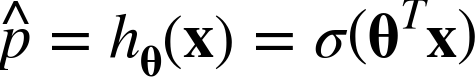

위 식에서 σ(·)은 0~1의 값을 출력하는 **시그모이드 함수(sigmoid function)**
시그모이드 함수에 대한 식은 다음과 같다.
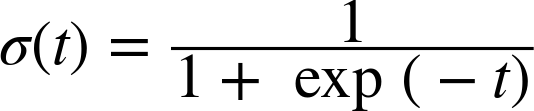

In [3]:
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

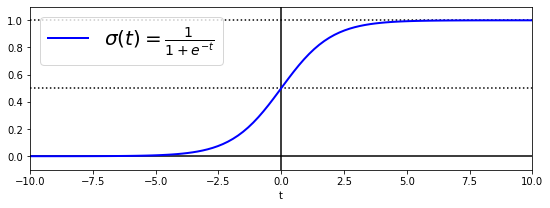

In [4]:
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

시그모이드 함수는 S자 형태를 띄며, 어떤 값(t)을 대입하면 0~1사이의 값을 반환하도록 해준다.

이를 이용해 양상 범주에 속할 확률을 추정하면, 이에 대한 예측 y_hat을 쉽게 구할 수 있다.

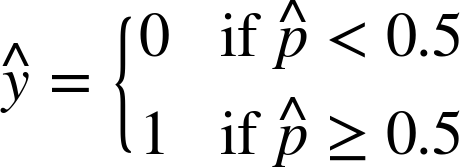

 t ≥ 0 이면 σ(t) ≥ 0.5이므로(반대는 반대로), 시그모이드 공식과 함께 생각하면 θ^T·x가 양수일때 1(양성 범주), 음수일 때 0(음성 범주)이라고 예측한다.

---
### 2. 훈련과 비용함수

 훈련(train)의 목적은 양성 샘플(y=1)에 대해서는 높은 확률, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것으로, 이때의 비용함수 식은 아래와 같다.
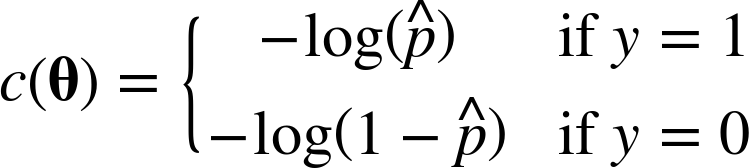

**로그 손실(log loss)**: 모든 훈련 샘플의 비용을 평균한 것, 아래 식 참고,
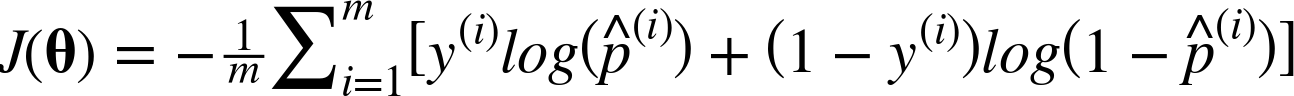



---
### 3. 결정 경계

꽃잎의 너비를 기준으로 기반으로 Iris-Versinica 종을 감지하는 이진분류기 만들기

In [5]:
# 데이터 로드
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [6]:
X = iris["data"][:,3:]    # 꽃잎의 너비 변수만 사용
y = (iris["target"]==2).astype("int")  # iris-Versinica면 1, 아니면 0

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

그러면 이제 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률을 계산해보자.

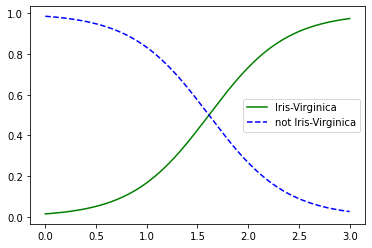

In [10]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


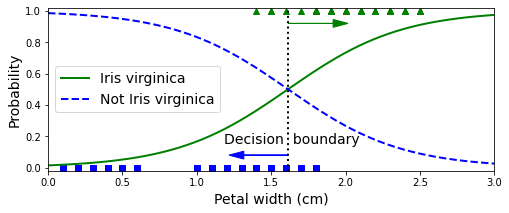

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")  # 음성범주 pointing
plt.plot(X[y==1], y[y==1], "g^")  # 양성범주 pointing

# 결정경계 표시
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# 추정확률 plotting
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

그래프를 보면 Iris-Verginica(y=1)는 꽃잎 너비가 1.4~2.5cm 사이에 분포(초록 삼각형)한다. Iris-Verginica가 아닌 꽃들은 일반적으로 꽃잎 너비가 더 작아 1.8cm보다 작게 분포한다. 따라서, 중첩되는 구간이 존재한다.

In [12]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [13]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

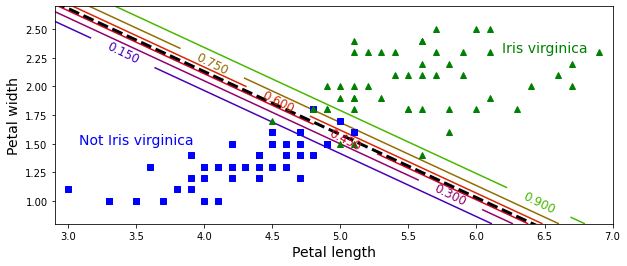

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

### 4. 소프트맥스 회귀(Softmax Regression)

**소프트맥스 회귀(Softmax Regression)** / **다항 로지스틱 회귀(Multinomial Logistic Regression)**

: 여러 개의 이진 분류기를 훈련시켜 연결하지 않고, 직접 다중 범주를 지원하도록 일반화될 수 있는 로지스틱 회귀 모델

*  원리:샘플 X가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s_k(x)를 계산하고, 그 점수에 소프트맥스 함수(또는 정규화된 지수함수)를 적용하여 각 범주별 속할 확률을 추정

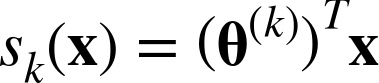





*   샘플 x에 대해 각 범주들의 점수가 계산되면 소프트맥스 함수를 통과시켜 범주k에 속할 확률 p_hat_k를 추정
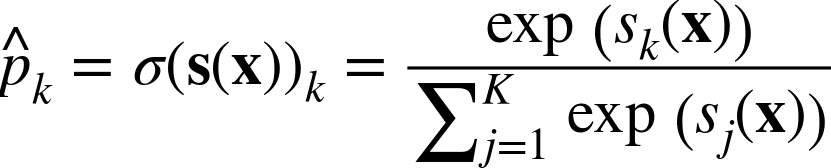







*   **k**: 범주의 수
*   **s(x)** : 샘플 x에 대한 각 범주의 점수를 담고 있는 벡터
*   **σ(s(x))k** : 이 샘플이 범주 k에 속할 확률

소프트맥스 회귀 분류기도 로지스틱 회귀와 마찬가지로 추정확률이 가장 높은 범주를 선택



*   **argmax**: 함수를 최대화하는 변수의 값을 반환한다

(numpy에도 비슷한 함수가 있는데 array에서 최댓값을 가지는 원소의 index를 반환).
*   위 함수에서는 추정확률 σ(s(x))k가 최대인 k값을 반환





크로스 엔트로피(cross entropy) 비용함수를 최소화 하는 것은 타깃 범주에 대해 낮은 확률을 예측하는 모델을 억제하므로 목적과 부합
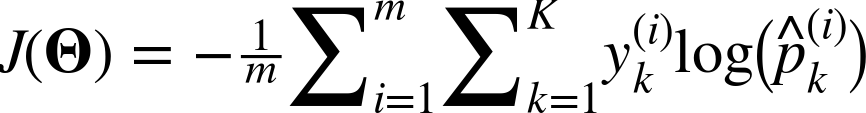

**크로스 엔트로피**는 추정된 범주의 확률이 타깃 범주에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다. 이해를 돕기위해 이진분류라고 가정하면(K=2), 이 비용함수는 로지스틱 회귀의 비용함수와 같아질 것이다. 이 비용함수의 θ(k)에 대한 그래디언트 벡터는 다음과 같다.

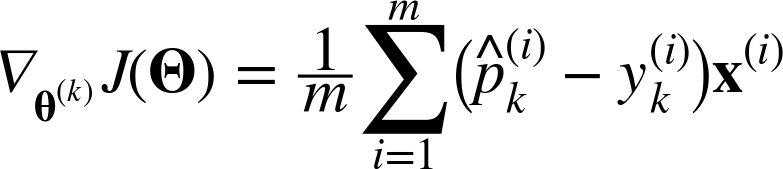



*   **LogisticRegression**: 범주가 2이상이면 일대다(OvA) 전략을 사용
*   **multi_class='multinomial**': 소프트맥스 회귀 사용
*   **solver='lbfgs'**: 소프트맥스 회귀를 지원하도록 알고리즘을 지정
*   **c**: 하이퍼파라미터. 조절할 수 있는 ℓ2규제가 적용됨.





In [15]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이와 너비 변수
y = iris["target"]           # 3개의 범주 그대로 사용

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

꽃잎 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 품종을 분류하도록 분류기에 넣어보자.

In [16]:
softmax_reg.predict([[5,2]])

array([2])

In [17]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

약 94%의 확률로 Iris-Verginica(y=2)라고 분류하는 것을 알 수 있음

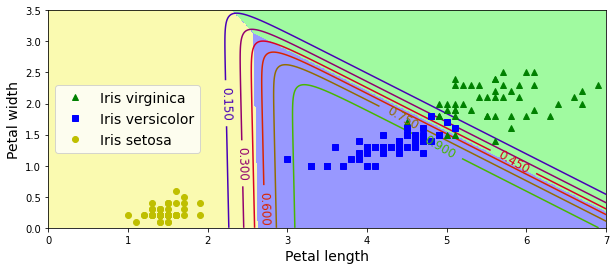

In [18]:
# 새로운 샘플 생성
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()